In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from itertools import cycle
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics 
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score , roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red_vals_newest.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [3]:
df_bin = df.copy()
df_bin.labels = df.labels.replace([2, 3, 4], 1)

In [4]:
features = df_bin.iloc[:, :7]
#features = features.drop(columns=['lead_etas', 'sub_etas'])
labels = df_bin.labels

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [18]:
ass_train_mc_bin = {0:0, 1:0}#, 2:0, 3:0, 4:0}
for i in y_train:
    ass_train_mc_bin[i]+=1

ass_test_mc_bin = {0:0, 1:0}#, 2:0, 3:0, 4:0}
for i in y_test:
    ass_test_mc_bin[i]+=1

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, df.labels, test_size=0.2, random_state=42)

In [20]:
ass_train_mc = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in y_train:
    ass_train_mc[i]+=1

ass_test_mc = {0:0, 1:0, 2:0, 3:0, 4:0}
for i in y_test:
    ass_test_mc[i]+=1

In [30]:
ass_train_mc_pc = [i/sum(ass_train_mc.values()) for i in ass_train_mc.values()]
ass_test_mc_pc = [i/sum(ass_test_mc.values()) for i in ass_test_mc.values()]
ass_train_mc_bin_pc = [i/sum(ass_train_mc_bin.values()) for i in ass_train_mc_bin.values()]
ass_test_mc_bin_pc = [i/sum(ass_test_mc_bin.values()) for i in ass_test_mc_bin.values()]

In [31]:
print(ass_train_mc_pc, '\n', ass_test_mc_pc, '\n', ass_train_mc_bin_pc, '\n', ass_test_mc_bin_pc)

[0.5000334274952919, 0.1620743879472693, 0.1086228813559322, 0.13202871939736346, 0.09724058380414313] 
 [0.49986629001883237, 0.1624557438794727, 0.10800188323917137, 0.13191902071563089, 0.09775706214689266] 
 [0.5000334274952919, 0.4999665725047081] 
 [0.49986629001883237, 0.5001337099811676]


In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [33]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=15,
                            min_samples_leaf=0.10415356125165282,
                           min_samples_split=0.7750326118336215)
bdt = AdaBoostClassifier(tree, 
                         learning_rate=0.7319678651559283,#optimizer.max["params"]['learning_rate'], 
                         n_estimators=20)#best_params['n_estimators'])

In [34]:
bdt.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.10415356125165282,
                                                    min_samples_split=0.7750326118336215),
                   learning_rate=0.7319678651559283, n_estimators=20)

In [35]:
df = pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0')
sig = pd.read_csv('df_modelB_red_vals_newest.csv').drop(columns = 'Unnamed: 0')

In [36]:
sig = sig[sig.vals==3500]
sig.labels = [1]*len(sig)

In [37]:
data = pd.concat([df,sig])
data

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1888.168945,1.829987,201.025452,0.839641,-1.037925,31,37,1000,-40.242415,-42.777139,0
1,2389.667480,2.411867,3.136414,1.571662,-0.880877,52,55,1000,-21.474150,-28.299496,0
2,1293.717407,0.340623,10.156311,-0.436375,-0.096425,34,23,1000,-32.641184,-50.163837,0
3,1986.557251,1.809374,59.459229,1.076468,-0.814361,41,37,1000,-30.780724,-43.602455,0
4,1270.481201,0.580307,226.615509,-0.263168,0.367645,50,65,1000,-16.408087,-7.843346,0
...,...,...,...,...,...,...,...,...,...,...,...
288059,2817.088867,2.997719,44.682678,-1.616741,1.408582,49,41,3500,-25.602296,-44.127285,1
288060,2227.487061,2.162484,111.665527,-0.232579,1.980299,75,48,3500,2.117575,-34.339867,1
288061,1744.639160,0.023498,279.729736,0.826092,0.797035,141,73,3500,70.646482,-5.444073,1
288062,3392.883301,0.709071,29.820679,0.593670,-0.116672,43,32,3500,-32.552726,-54.328880,1


In [5]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=15,
                            min_samples_leaf=0.36931642349065275,
                           min_samples_split=0.7479086208293507)
bdt = AdaBoostClassifier(tree, 
                         learning_rate=0.9912684934237729, 
                         n_estimators=80)
bdt_bin = AdaBoostClassifier(tree, 
                         learning_rate=0.67, 
                         n_estimators=80)

In [27]:
bdt_bin

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

In [38]:
features = data.iloc[:, :7]
features = features.drop(columns=['lead_etas', 'sub_etas'])
labs = data.labels

In [39]:
features

,mjjs,dyjjs,pt_asyms,lead_ungrs,sub_ungrs
0,1888.168945,1.829987,201.025452,31,37
1,2389.667480,2.411867,3.136414,52,55
2,1293.717407,0.340623,10.156311,34,23
3,1986.557251,1.809374,59.459229,41,37
4,1270.481201,0.580307,226.615509,50,65
...,...,...,...,...,...
288059,2817.088867,2.997719,44.682678,49,41
288060,2227.487061,2.162484,111.665527,75,48
288061,1744.639160,0.023498,279.729736,141,73
288062,3392.883301,0.709071,29.820679,43,32


In [41]:
features = StandardScaler().fit_transform(features)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labs, test_size=0.2, random_state=42, shuffle=True)

In [9]:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [10]:
bdt_bin.fit(x_train_scaled, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

In [42]:
y_preds = bdt.predict(features)
precision = precision_score(labs, y_preds, average='weighted')
recall = recall_score(labs, y_preds, average='weighted')
f1 = f1_score(labs, y_preds, average='weighted')
accuracy = accuracy_score(labs, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.912
Recall: 0.955
F1: 0.933
Accuracy: 0.955


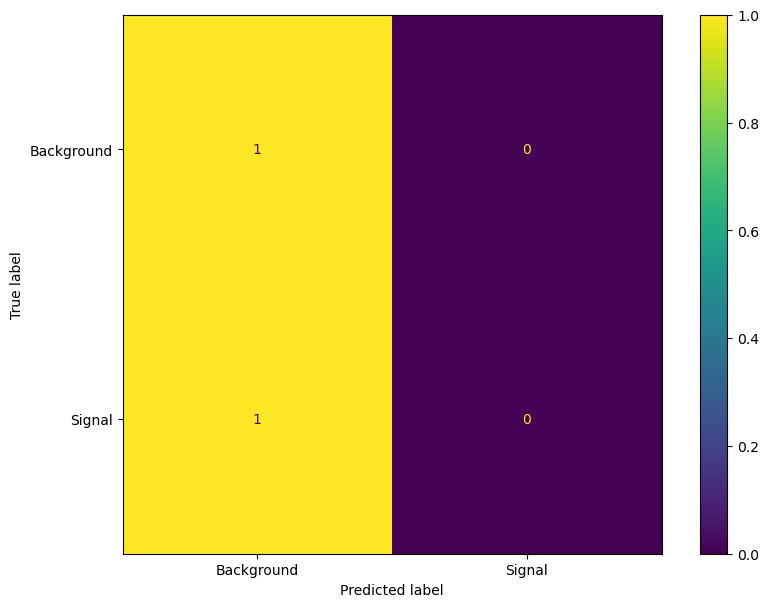

In [44]:
cm = confusion_matrix(labs, y_preds, normalize='true', )
tick_labs = ['Background', 'Signal']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize = (10, 7))
cm_display.plot(ax=ax)
plt.show()

# Randomly sample background to match numbers of 'signal'

In [45]:
bkg = df.sample(len(sig), random_state=42, ignore_index=True)

In [46]:
bkg

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1368.968140,0.445323,164.769531,0.582369,1.024441,56,33,1000,-11.366465,-41.167761,0
1,1645.257812,0.607016,1.574158,1.325974,0.718258,43,53,1000,-26.660480,-24.427054,0
2,1482.918213,0.665826,254.784424,-1.039746,-1.753976,38,37,1000,-30.380926,-38.591456,0
3,1684.335205,1.374437,275.123413,-1.631057,-0.234377,30,48,1000,-39.940871,-29.836375,0
4,1640.052612,1.700335,21.521240,-0.314140,1.398501,33,29,1000,-36.622345,-48.371597,0
...,...,...,...,...,...,...,...,...,...,...,...
62497,1278.795288,0.904981,174.350494,0.910417,1.805606,22,21,1000,-44.491992,-51.958595,0
62498,1278.858643,0.221698,26.894836,0.372391,0.124327,61,31,1000,-5.492629,-41.959471,0
62499,1652.169678,1.834287,9.510803,-1.241151,0.599869,35,13,1000,-34.710832,-64.500352,0
62500,1211.094116,0.222539,163.683472,0.711576,0.949918,39,30,1000,-26.792369,-42.001333,0


In [47]:
data_red = pd.concat([bkg, sig])
data_red

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1368.968140,0.445323,164.769531,0.582369,1.024441,56,33,1000,-11.366465,-41.167761,0
1,1645.257812,0.607016,1.574158,1.325974,0.718258,43,53,1000,-26.660480,-24.427054,0
2,1482.918213,0.665826,254.784424,-1.039746,-1.753976,38,37,1000,-30.380926,-38.591456,0
3,1684.335205,1.374437,275.123413,-1.631057,-0.234377,30,48,1000,-39.940871,-29.836375,0
4,1640.052612,1.700335,21.521240,-0.314140,1.398501,33,29,1000,-36.622345,-48.371597,0
...,...,...,...,...,...,...,...,...,...,...,...
288059,2817.088867,2.997719,44.682678,-1.616741,1.408582,49,41,3500,-25.602296,-44.127285,1
288060,2227.487061,2.162484,111.665527,-0.232579,1.980299,75,48,3500,2.117575,-34.339867,1
288061,1744.639160,0.023498,279.729736,0.826092,0.797035,141,73,3500,70.646482,-5.444073,1
288062,3392.883301,0.709071,29.820679,0.593670,-0.116672,43,32,3500,-32.552726,-54.328880,1


In [48]:
features_red = data_red.iloc[:, :7]
features_red = features_red.drop(columns=['lead_etas', 'sub_etas'])
labs_red = data_red.labels

In [19]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(features_red, labs_red, test_size=0.2, random_state=42)

In [20]:
x_train_red_scaled = StandardScaler().fit_transform(x_train_red)
x_test_red_scaled = StandardScaler().fit_transform(x_test_red)

In [21]:
bdt_bin.fit(x_train_red_scaled, y_train_red)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

In [49]:
features_red = StandardScaler().fit_transform(features_red)

In [51]:
y_preds = bdt.predict(features_red)
precision = precision_score(labs_red, y_preds, average='weighted')
recall = recall_score(labs_red, y_preds, average='weighted')
f1 = f1_score(labs_red, y_preds, average='weighted')
accuracy = accuracy_score(labs_red, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.250
Recall: 0.500
F1: 0.333
Accuracy: 0.500


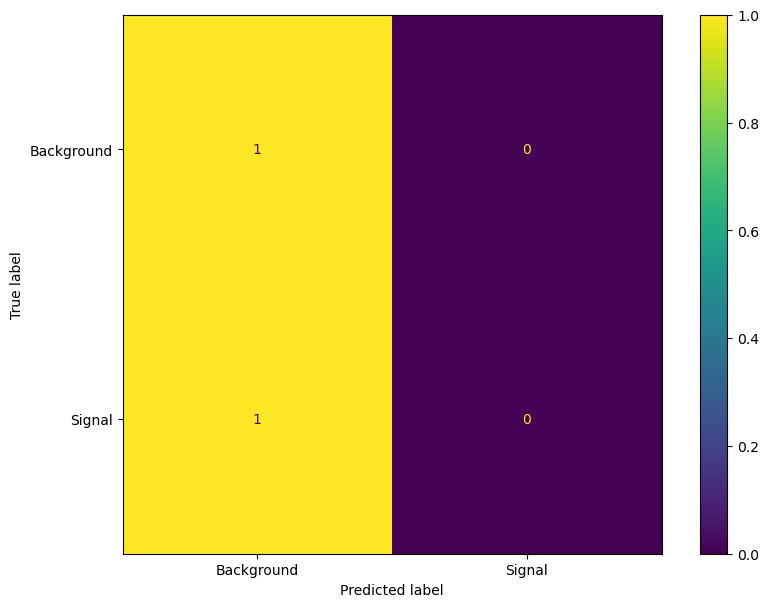

In [52]:
cm = confusion_matrix(labs_red, y_preds, normalize='true', )
tick_labs = ['Background', 'Signal']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize = (10, 7))
cm_display.plot(ax=ax)
plt.show()

In [22]:
y_preds = bdt_bin.predict(x_test_red_scaled)
precision = precision_score(y_test_red, y_preds)
recall = recall_score(y_test_red, y_preds)
f1 = f1_score(y_test_red, y_preds)
accuracy = accuracy_score(y_test_red, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.950
Recall: 0.963
F1: 0.956
Accuracy: 0.957


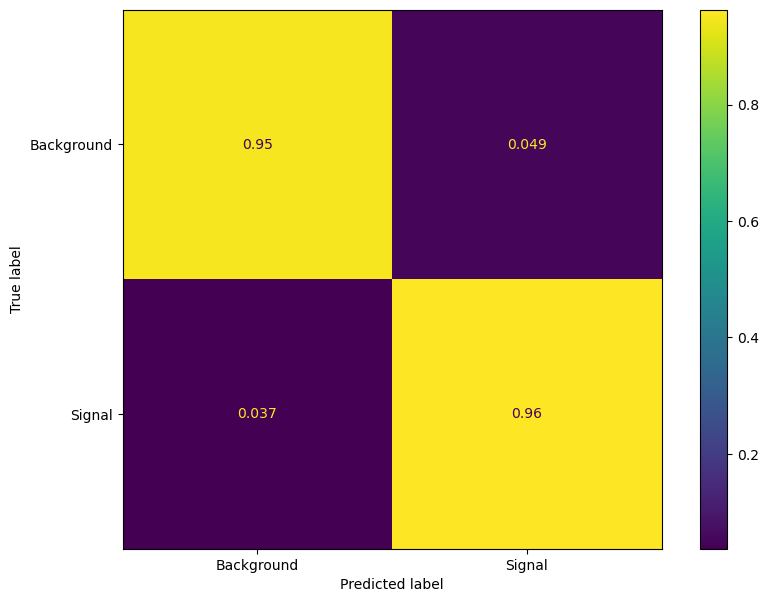

In [23]:
cm = confusion_matrix(y_test_red, y_preds, normalize='true', )
tick_labs = ['Background', 'Signal']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize = (10, 7))
cm_display.plot(ax=ax)
plt.show()

# Testing one model, one mass from bkg

In [96]:
df = pd.read_csv('df_modelB_red_vals_newest.csv').drop(columns = 'Unnamed: 0')
df = pd.concat([df, pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0').sample(len(df))], ignore_index=True) 
df = df.loc[(df.vals == 3500) | (df.vals == 1000)].reset_index().drop(columns='index')
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,3518.004639,1.743339,80.914307,0.344924,-1.411514,17,44,3500,-58.721763,-42.449564,2
1,3345.403564,1.622946,38.578491,-0.322567,1.308947,51,58,3500,-24.486673,-28.272193,2
2,3000.579834,2.173928,85.426819,0.506430,-1.676855,53,52,3500,-21.951592,-33.644651,2
3,2555.247070,1.477940,332.859802,0.714125,-0.799472,49,83,3500,-24.975692,-1.120896,2
4,2575.017334,2.455507,326.553589,1.044713,-1.429945,42,45,3500,-32.029533,-39.208936,2
...,...,...,...,...,...,...,...,...,...,...,...
350561,1223.577393,0.340733,55.239868,0.662297,0.316363,40,15,1000,-25.924195,-57.181079,0
350562,1415.061157,0.128644,52.640137,0.065364,-0.063759,28,30,1000,-39.788776,-44.757455,0
350563,1490.947021,0.677190,35.105469,0.866414,0.184415,39,32,1000,-29.448700,-43.687483,0
350564,2328.065430,1.924481,10.725403,-1.400020,0.608213,36,44,1000,-37.262091,-38.953796,0


In [97]:
#nbc = pkl.load(open('bdt_optimized_red.pkl', 'rb'))
#nbc_bin = pkl.load(open('bdt_bin_optimized_red.pkl', 'rb'))
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=15,
                            min_samples_leaf=0.36931642349065275,
                           min_samples_split=0.7479086208293507)
#nbc = AdaBoostClassifier(tree, 
#                         learning_rate=0.9912684934237729, 
#                         n_estimators=80)
nbc_bin = AdaBoostClassifier(tree, 
                         learning_rate=0.67, 
                         n_estimators=80)  

In [98]:
features = df.iloc[:, :7]
df.labels = df.labels.replace(2, 1)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(features, df.labels, test_size=0.2, random_state=42, shuffle=True)
#_, _, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42, shuffle=True)

In [100]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [47]:
#nbc.fit(x_train, y_train)

In [101]:
nbc_bin.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

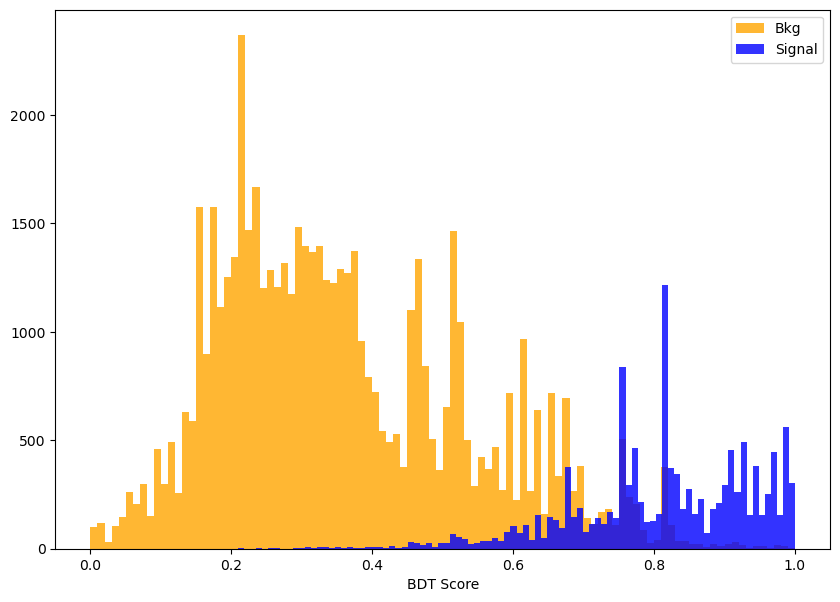

In [102]:
probs = nbc_bin.predict_proba(x_test)

scaled = MinMaxScaler().fit_transform(probs)[:, 1]
plt.figure(figsize=(10,7))
plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
plt.hist(x=scaled[y_test==1], color='blue', label = 'Signal', bins=100, alpha=0.8)
#sns.histplot(x=scaled[:,0], color='orange', label = 'Bkg')
#sns.histplot(x=scaled[:,1], color='cyan', label = 'Signal')
plt.xlabel('BDT Score')
plt.legend()
plt.savefig('plots/fixed_scores/bdt_bin_scores_B_3500.png')
plt.show()

#ONE VS REST
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    #y_test_new = y_test.replace(to_replace=new, value=0)
    #y_test_new = y_test_new.replace(i, 1)
    y_train_new = y_train.replace(to_replace = new, value = 0)
    y_train_new = y_train_new.replace(i, 1)
    nbc.fit(x_train, y_train_new)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    print(preds)
    scaled = MinMaxScaler().fit_transform(probs)
    plt.figure(figsize=(10,7))
    sns.histplot(x=scaled[:,0], color='orange', label = 'Model %s'%models[i])
    sns.histplot(x=scaled[:,1], color='cyan', label = 'Bkg and Others')
    plt.xlabel('BDT Score')
    plt.legend()
    plt.show()

proba_trees_multi = [nbc.estimators_[i].predict_proba(x_test) for i in range(len(nbc.estimators_))]
proba_trees_multi

proba_sum_multi = [[0,0, 0,0, 0]]
for i in range(len(proba_trees_multi)):
    proba_sum_multi+=proba_trees_multi[i]

# ROC Curves

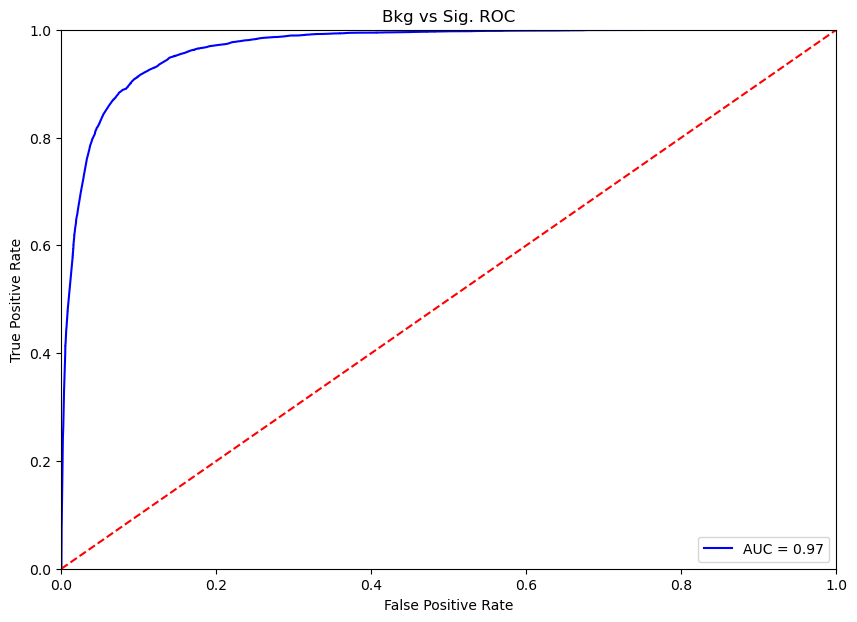

In [73]:
probs = nbc_bin.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/bdt_bin_roc_modelB_3500.png')
plt.show()

In [74]:
opt_thresh_bin = threshold[np.argmax(tpr-fpr)]
opt_thresh_bin

0.4931103398657674

# Train with mass values

In [135]:
df = pd.read_csv('df_modelB_red_vals_newest.csv').drop(columns = 'Unnamed: 0')
df = pd.concat([df, pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0').sample(len(df))], ignore_index=True) 
#df = df.loc[(df.vals == 3500) | (df.vals == 1000)].reset_index().drop(columns='index')
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1402.581299,0.871598,32.906128,-0.365797,0.511474,31,27,1500,-36.676056,-47.599662,2
1,1364.624146,0.248815,11.314331,-1.412127,-1.184823,27,36,1500,-40.325813,-38.111205,2
2,1313.775146,0.821408,199.295685,0.748594,-0.078150,55,81,1500,-11.838904,7.563519,2
3,1059.248657,0.524746,153.512939,-0.920422,-1.466679,46,90,1500,-18.084307,20.305179,2
4,1299.648315,0.598796,15.129028,-0.617076,-1.203475,67,46,1500,0.300016,-27.244841,2
...,...,...,...,...,...,...,...,...,...,...,...
576123,1525.642822,1.117325,150.785950,-1.611354,-0.475205,40,46,1000,-28.736100,-30.096090,0
576124,1427.342163,0.291075,26.151001,-0.047490,-0.339352,49,42,1000,-18.898534,-32.911388,0
576125,1466.043579,0.880836,15.834106,0.396562,-0.496678,42,40,1000,-26.236915,-35.387812,0
576126,1688.525757,0.984126,69.430237,-0.241855,0.748912,24,49,1000,-45.970327,-28.879539,0


In [136]:
features = df.iloc[:, :8]
df.labels = df.labels.replace(2, 1)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(features, df.labels, test_size=0.2, random_state=42, shuffle=True)
#_, _, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42, shuffle=True)

In [138]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [47]:
#nbc.fit(x_train, y_train)

In [139]:
nbc_bin.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

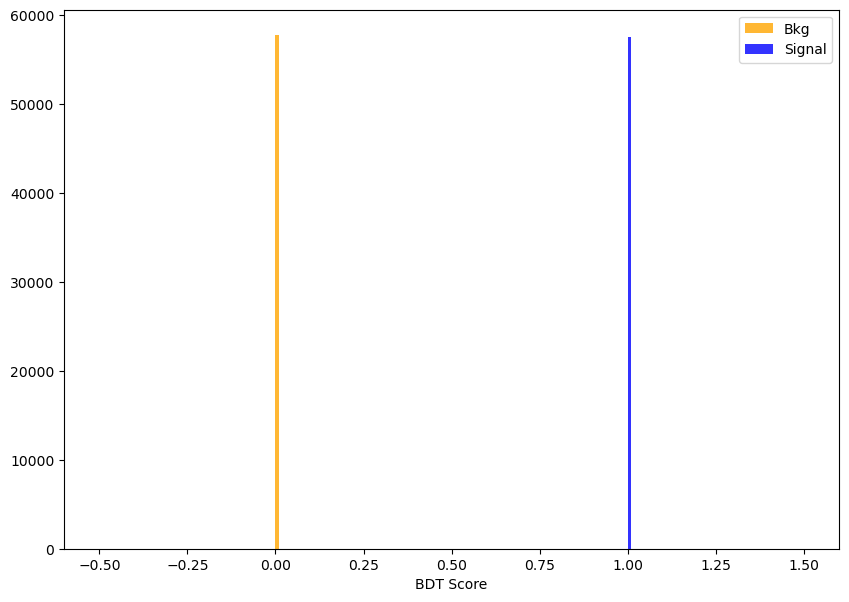

In [108]:
probs = nbc_bin.predict_proba(x_test)

scaled = MinMaxScaler().fit_transform(probs)[:, 1]
plt.figure(figsize=(10,7))
plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
plt.hist(x=scaled[y_test==1], color='blue', label = 'Signal', bins=100, alpha=0.8)
#sns.histplot(x=scaled[:,0], color='orange', label = 'Bkg')
#sns.histplot(x=scaled[:,1], color='cyan', label = 'Signal')
plt.xlabel('BDT Score')
plt.legend()
plt.savefig('plots/fixed_scores/bdt_bin_scores_B_all_masses.png')
plt.show()

#ONE VS REST
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    #y_test_new = y_test.replace(to_replace=new, value=0)
    #y_test_new = y_test_new.replace(i, 1)
    y_train_new = y_train.replace(to_replace = new, value = 0)
    y_train_new = y_train_new.replace(i, 1)
    nbc.fit(x_train, y_train_new)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    print(preds)
    scaled = MinMaxScaler().fit_transform(probs)
    plt.figure(figsize=(10,7))
    sns.histplot(x=scaled[:,0], color='orange', label = 'Model %s'%models[i])
    sns.histplot(x=scaled[:,1], color='cyan', label = 'Bkg and Others')
    plt.xlabel('BDT Score')
    plt.legend()
    plt.show()

proba_trees_multi = [nbc.estimators_[i].predict_proba(x_test) for i in range(len(nbc.estimators_))]
proba_trees_multi

proba_sum_multi = [[0,0, 0,0, 0]]
for i in range(len(proba_trees_multi)):
    proba_sum_multi+=proba_trees_multi[i]

# ROC Curves

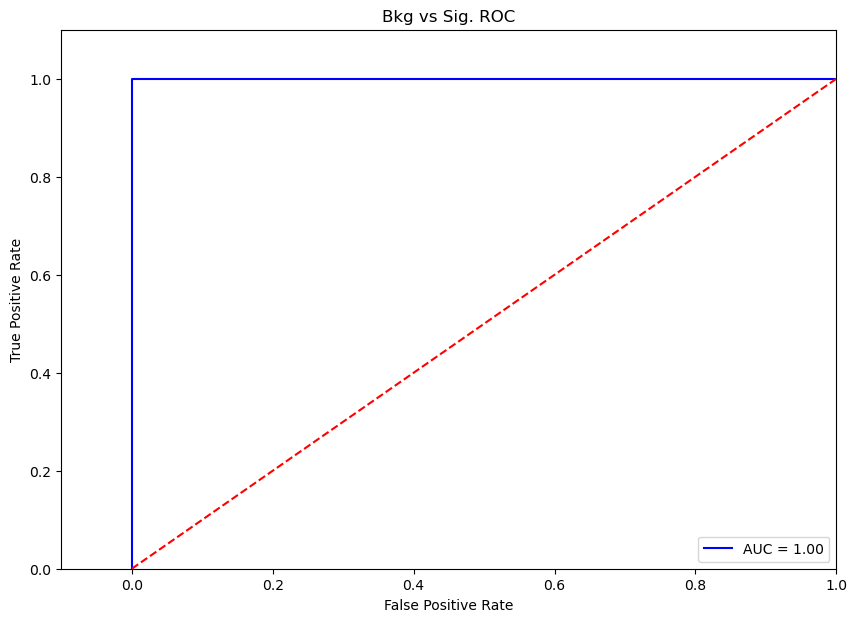

In [140]:
probs = nbc_bin.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/bdt_bin_roc_modelB_all_masses.png')
plt.show()

In [110]:
opt_thresh_bin = threshold[np.argmax(tpr-fpr)]
opt_thresh_bin

0.9999999999999998

In [111]:
nbc_bin.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1.])

# Train on all models and mass values

In [112]:
df = pd.read_csv('df_bkg_red_vals_new.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red_vals_newest.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,vals,lead_ntrk,sub_ntrk,labels
0,1888.168945,1.829987,201.025452,0.839641,-1.037925,31,37,1000,-40.242415,-42.777139,0
1,2389.667480,2.411867,3.136414,1.571662,-0.880877,52,55,1000,-21.474150,-28.299496,0
2,1293.717407,0.340623,10.156311,-0.436375,-0.096425,34,23,1000,-32.641184,-50.163837,0
3,1986.557251,1.809374,59.459229,1.076468,-0.814361,41,37,1000,-30.780724,-43.602455,0
4,1270.481201,0.580307,226.615509,-0.263168,0.367645,50,65,1000,-16.408087,-7.843346,0
...,...,...,...,...,...,...,...,...,...,...,...
2654995,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,3500,-16.311280,44.333506,4
2654996,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,3500,3.673315,-6.691277,4
2654997,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,3500,126.251694,12.251655,4
2654998,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,3500,61.481212,17.241032,4


In [115]:
features = df.iloc[:, :8]
labels = df.labels
labels_bin = df.labels.replace([2, 3, 4], 1)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(features, df.labels, test_size=0.2, random_state=42, shuffle=True)
_, _, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42, shuffle=True)

In [117]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [118]:
nbc.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.9912684934237729, n_estimators=80)

In [119]:
nbc_bin.fit(x_train, y_train_bin)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

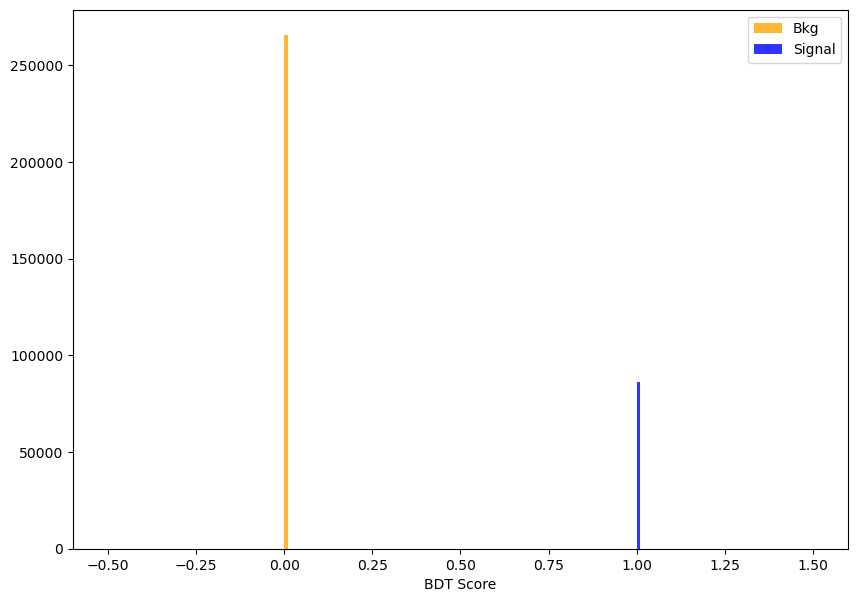

In [120]:
probs = nbc_bin.predict_proba(x_test)

scaled = MinMaxScaler().fit_transform(probs)[:, 1]
plt.figure(figsize=(10,7))
plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
plt.hist(x=scaled[y_test==1], color='blue', label = 'Signal', bins=100, alpha=0.8)
plt.xlabel('BDT Score')
plt.legend()
plt.savefig('plots/fixed_scores/bdt_bin_scores_all_masses_all_models.png')
plt.show()

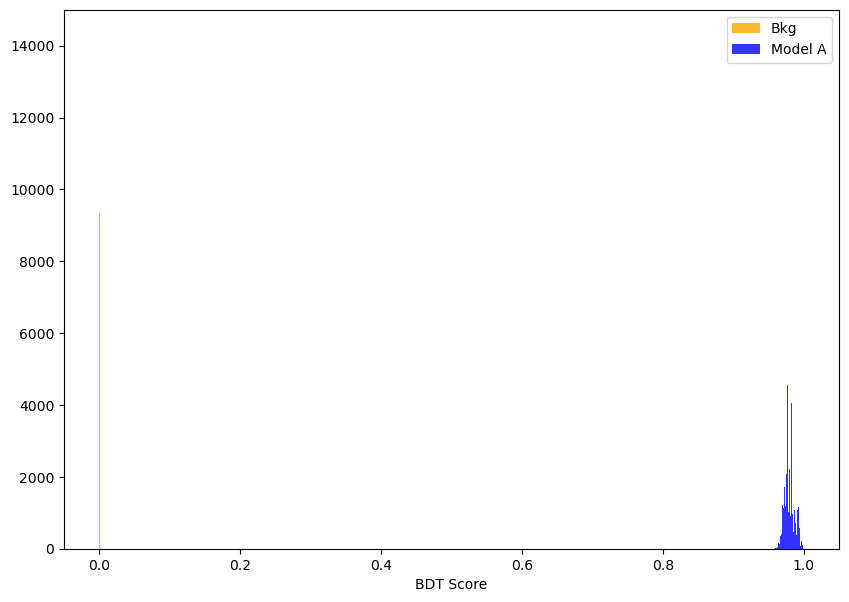

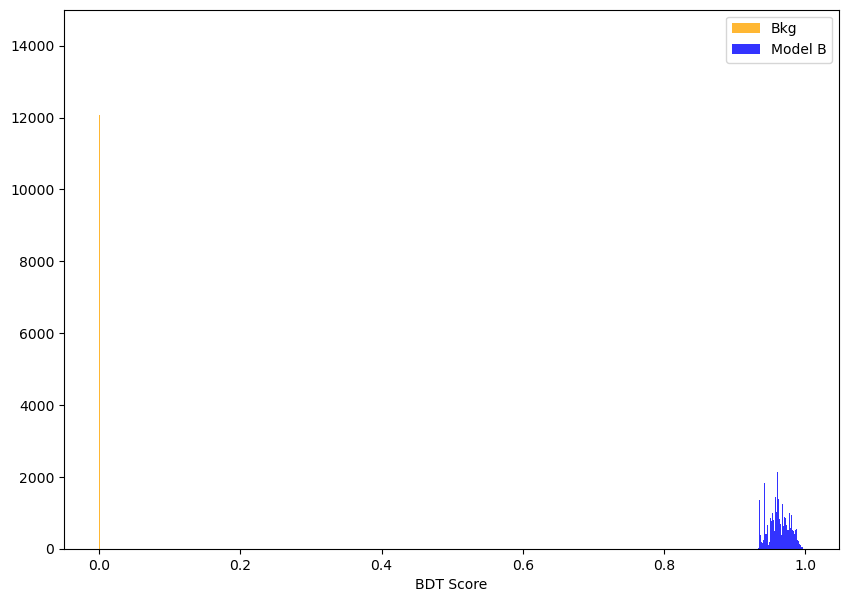

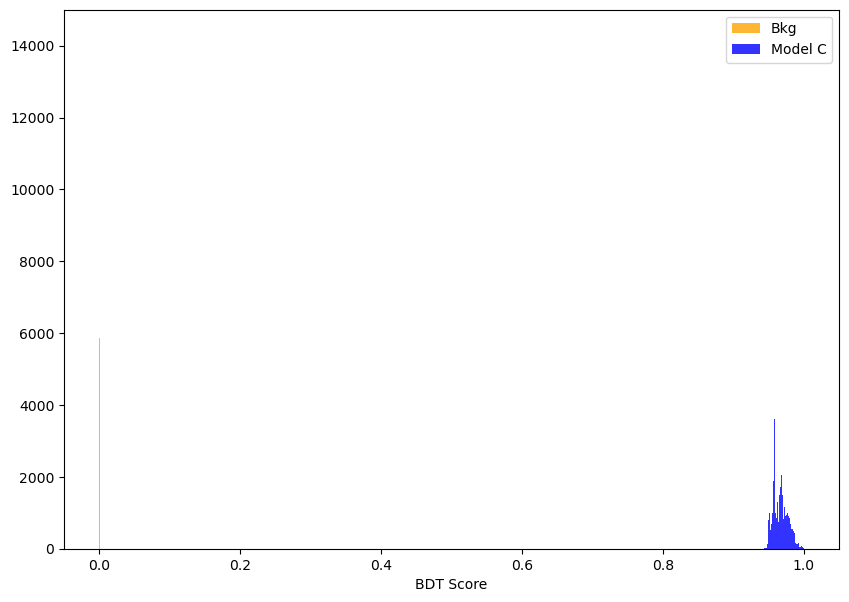

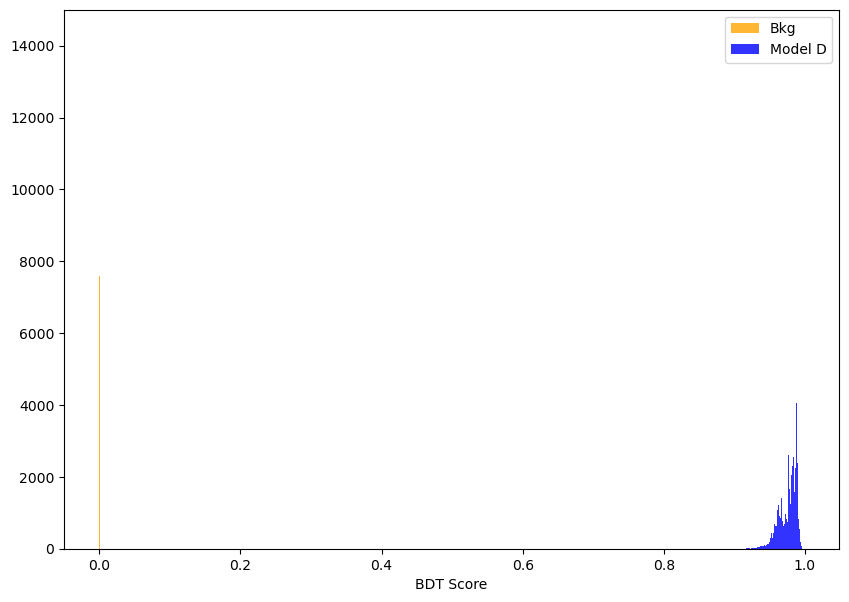

In [126]:
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    probs = nbc.predict_proba(x_test)
    
    scaled = MinMaxScaler().fit_transform(probs)[:,i]
    plt.figure(figsize=(10,7))
    plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
    plt.hist(x=scaled[y_test==i], color='blue', label = 'Model %s'%models[i], bins=100, alpha=0.8)
    plt.xlabel('BDT Score')
    plt.ylim([0, 15000])
    plt.legend()
    plt.savefig('plots/fixed_scores/bdt_bkg_vs_model%s_scores_all_masses.png'%models[i])
    plt.show()

# ROC Curves

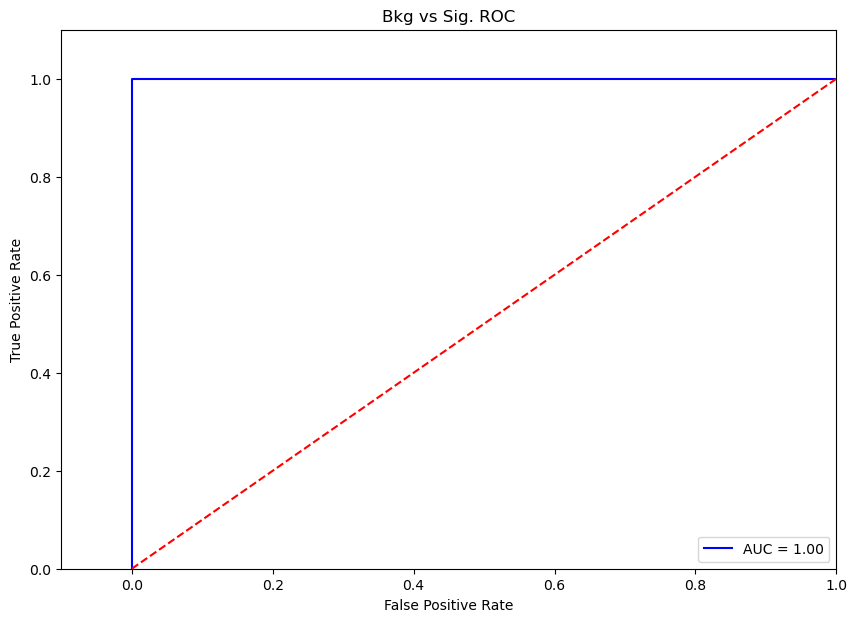

In [129]:
probs = nbc_bin.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test_bin, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/bdt_bin_roc_all_masses_all_models.png')
plt.show()

In [132]:
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    #x_test_new = [x_test[j] for j in range(len(y_test)) if (y_test.values[j] == i) or (y_test.values[j] == 0)]
    #y_test_new = [k for k in y_test.values if (k==i) or (k==0)]
    preds = nbc.predict_proba(x_test)[:,i]
    #preds = probs[:, i]
    fp, tp, thresh = roc_curve(y_test, preds, pos_label=i)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

Model A optimum classification threshold: 0.248
Model B optimum classification threshold: 0.247
Model C optimum classification threshold: 0.248
Model D optimum classification threshold: 0.249


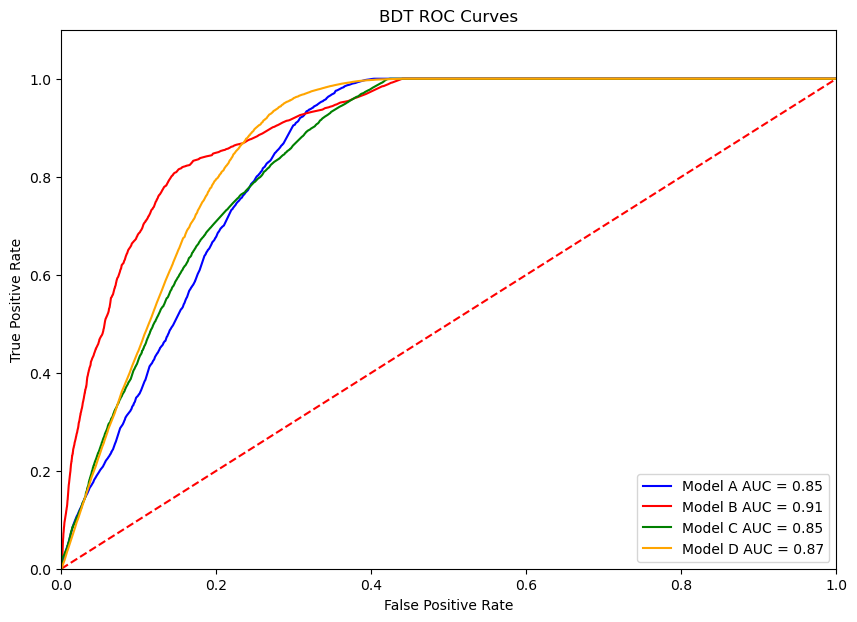

In [134]:
models = ['Bkg', 'A', 'B', 'C', 'D']
colours = ['None', 'b', 'r', 'g', 'orange']
plt.figure(figsize=(10,7))
plt.title('BDT ROC Curves')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i in fpr_tpr_auc.keys():
    plt.plot(fpr_tpr_auc[i]['fpr'], fpr_tpr_auc[i]['tpr'], 
             colours[i], label = 'Model %s AUC = %0.2f' %(models[i], fpr_tpr_auc[i]['roc_auc']))
    opt_thresh = fpr_tpr_auc[i]['threshold'][np.argmax(fpr_tpr_auc[i]['tpr']-fpr_tpr_auc[i]['fpr'])]
    print('Model %s optimum classification threshold: %0.3f'%(models[i], opt_thresh))
plt.legend(loc = 'lower right')
plt.savefig('plots/fixed_rocs/bdt_roc_all_masses.png')
plt.show()

In [130]:
nbc_bin.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [131]:
nbc.feature_importances_

array([0.15  , 0.0625, 0.075 , 0.0125, 0.0125, 0.0625, 0.075 , 0.55  ])

# Removing one variable at a time

In [142]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [143]:
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,lead_ntrk,sub_ntrk,weights,labels
0,1143.592529,0.039967,146.150787,0.525687,0.505117,38,48,-27.057099,-23.003627,1.003236e+00,0
1,1476.433716,1.387635,14.246826,-1.370057,0.113648,21,33,-47.325838,-42.513492,1.136396e+00,0
2,1540.057007,1.520813,94.611481,1.142746,-0.478356,46,31,-22.852907,-45.262825,2.008979e+00,0
3,1533.117432,1.955224,79.998779,-0.021801,1.994529,46,37,-22.796860,-39.182772,6.744341e+00,0
4,1164.201416,0.747826,97.815399,-0.216873,0.608687,40,45,-25.285624,-26.312875,7.691056e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
2067579,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,-16.311280,44.333506,1.238581e-11,4
2067580,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,3.673315,-6.691277,2.048238e-09,4
2067581,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,126.251694,12.251655,1.438433e-09,4
2067582,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,61.481212,17.241032,3.750820e-10,4


# Ungr

In [144]:
features = df.iloc[:, :5]
labels = df.labels
labels_bin = df.labels.replace([2, 3, 4], 1)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(features, df.labels, test_size=0.2, random_state=42, shuffle=True)
_, _, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42, shuffle=True)

In [146]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [147]:
nbc.fit(x_train, y_train)
nbc_bin.fit(x_train, y_train_bin)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    min_samples_leaf=0.36931642349065275,
                                                    min_samples_split=0.7479086208293507),
                   learning_rate=0.67, n_estimators=80)

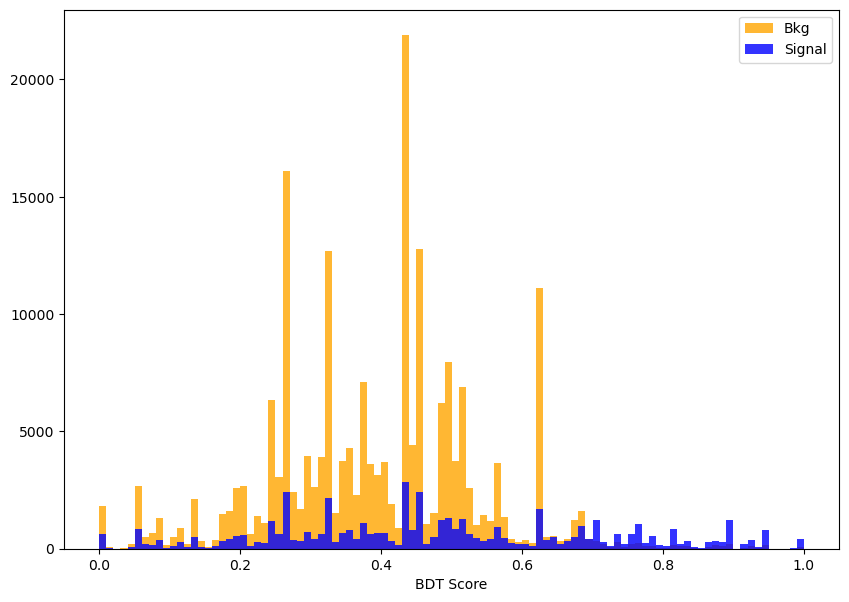

In [151]:
probs = nbc_bin.predict_proba(x_test)

scaled = MinMaxScaler().fit_transform(probs)[:, 1]
plt.figure(figsize=(10,7))
plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
plt.hist(x=scaled[y_test==1], color='blue', label = 'Signal', bins=100, alpha=0.8)
plt.xlabel('BDT Score')
plt.legend()
plt.savefig('plots/fixed_scores/bdt_bin_scores_no_ungr.png')
plt.show()

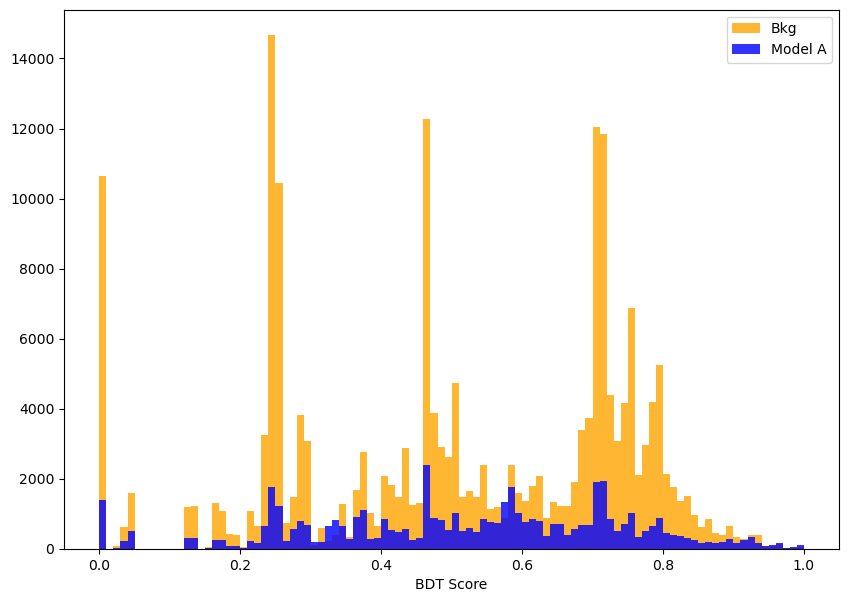

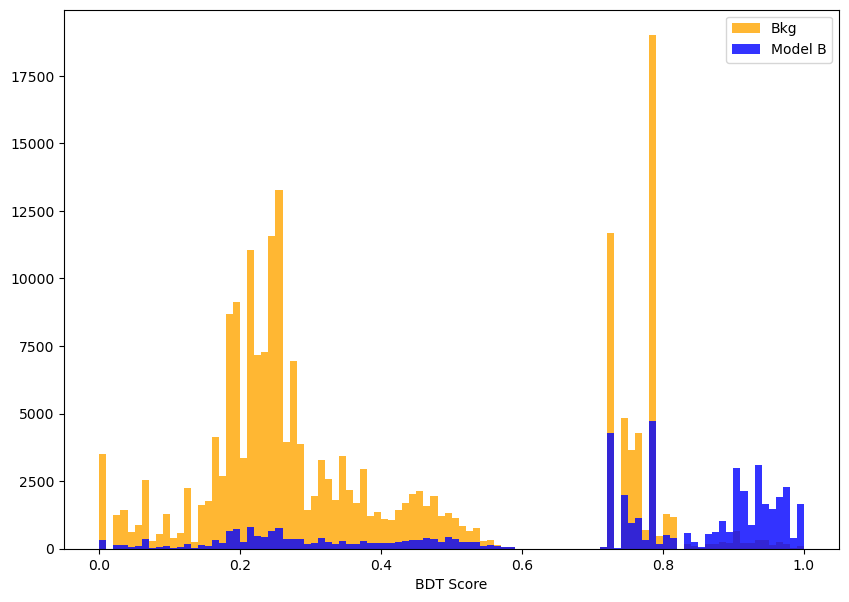

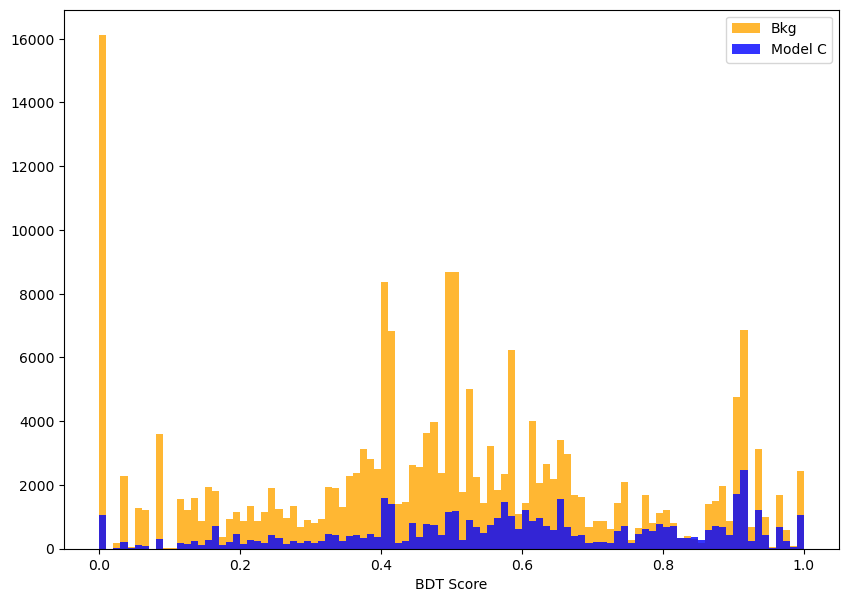

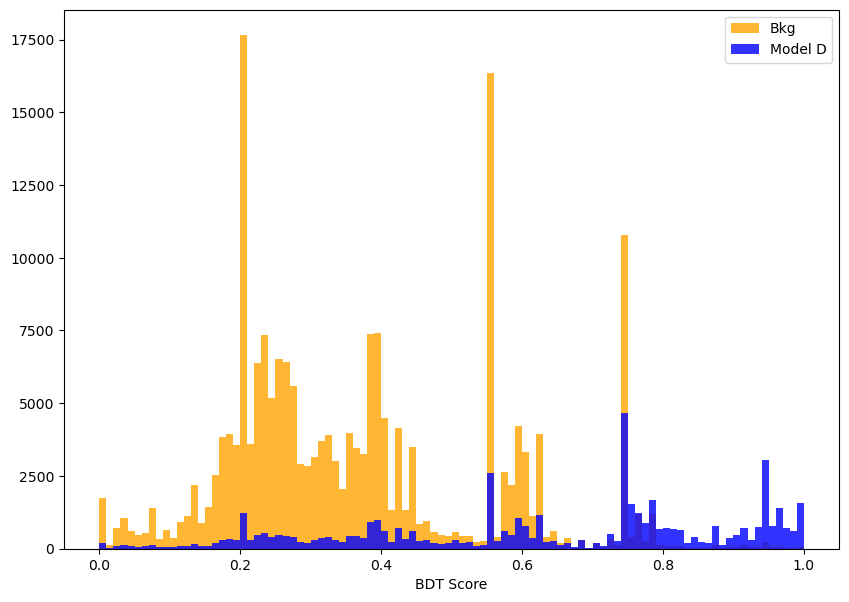

In [152]:
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    probs = nbc.predict_proba(x_test)
    
    scaled = MinMaxScaler().fit_transform(probs)[:,i]
    plt.figure(figsize=(10,7))
    plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
    plt.hist(x=scaled[y_test==i], color='blue', label = 'Model %s'%models[i], bins=100, alpha=0.8)
    plt.xlabel('BDT Score')
    plt.legend()
    plt.savefig('plots/fixed_scores/bdt_bkg_vs_model%s_scores_no_ungr.png'%models[i])
    plt.show()

# ROC Curves

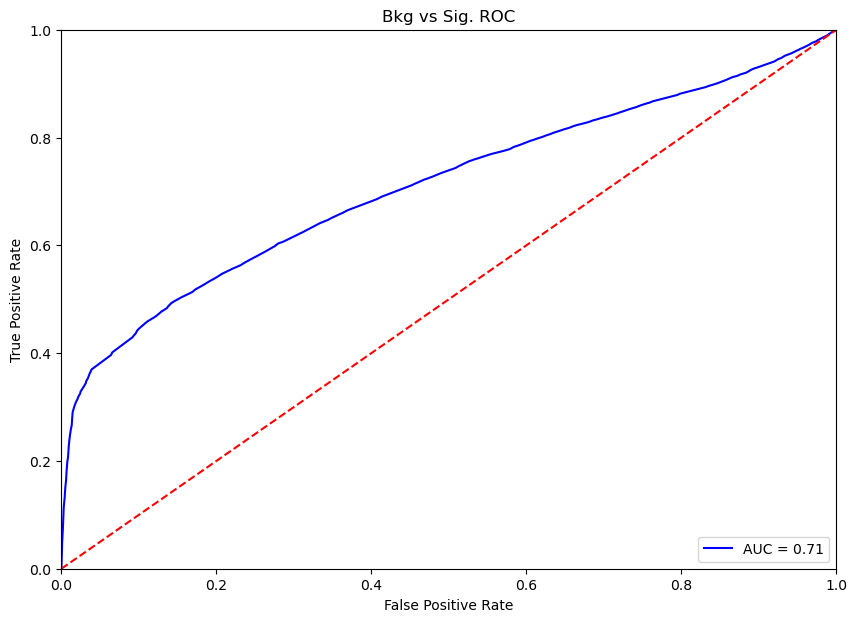

In [154]:
probs = nbc_bin.predict_proba(x_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test_bin, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/bdt_bin_roc_no_ungr.png')
plt.show()

In [155]:
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    #x_test_new = [x_test[j] for j in range(len(y_test)) if (y_test.values[j] == i) or (y_test.values[j] == 0)]
    #y_test_new = [k for k in y_test.values if (k==i) or (k==0)]
    preds = nbc.predict_proba(x_test)[:,i]
    #preds = probs[:, i]
    fp, tp, thresh = roc_curve(y_test, preds, pos_label=i)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

Model A optimum classification threshold: 0.199
Model B optimum classification threshold: 0.199
Model C optimum classification threshold: 0.200
Model D optimum classification threshold: 0.200


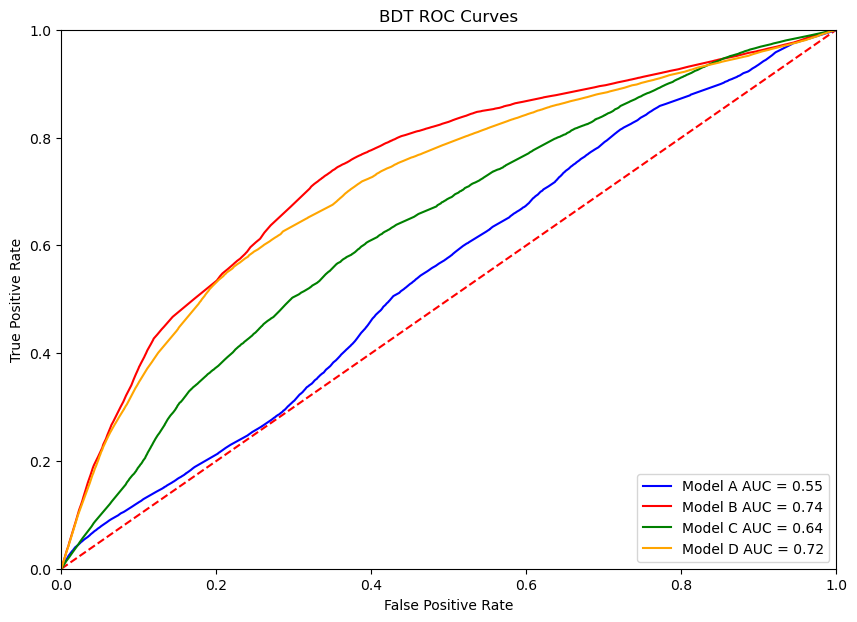

In [157]:
models = ['Bkg', 'A', 'B', 'C', 'D']
colours = ['None', 'b', 'r', 'g', 'orange']
plt.figure(figsize=(10,7))
plt.title('BDT ROC Curves')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i in fpr_tpr_auc.keys():
    plt.plot(fpr_tpr_auc[i]['fpr'], fpr_tpr_auc[i]['tpr'], 
             colours[i], label = 'Model %s AUC = %0.2f' %(models[i], fpr_tpr_auc[i]['roc_auc']))
    opt_thresh = fpr_tpr_auc[i]['threshold'][np.argmax(fpr_tpr_auc[i]['tpr']-fpr_tpr_auc[i]['fpr'])]
    print('Model %s optimum classification threshold: %0.3f'%(models[i], opt_thresh))
plt.legend(loc = 'lower right')
plt.savefig('plots/fixed_rocs/bdt_roc_no_ungr.png')
plt.show()